## Loading the required librariries such as Pandas, Numpy, Matplotlib and Seaborn

In [46]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Data Selection

In [49]:
data = pd.read_csv("F:/customer_data.csv")

In [50]:
data.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
0,1,56,89740,29
1,2,69,131352,47
2,3,46,81617,68
3,4,32,31896,76
4,5,60,145798,45


In [51]:
data.tail()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
495,496,43,79435,74
496,497,70,55631,98
497,498,40,144038,57
498,499,26,35103,90
499,500,29,79772,41


In [52]:
data.shape

(500, 4)

In [53]:
data.dtypes

CustomerID                int64
Age                       int64
Annual Income ($)         int64
Spending Score (1-100)    int64
dtype: object

In [54]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of      CustomerID  Age  Annual Income ($)  Spending Score (1-100)
0             1   56              89740                      29
1             2   69             131352                      47
2             3   46              81617                      68
3             4   32              31896                      76
4             5   60             145798                      45
..          ...  ...                ...                     ...
495         496   43              79435                      74
496         497   70              55631                      98
497         498   40             144038                      57
498         499   26              35103                      90
499         500   29              79772                      41

[500 rows x 4 columns]>

In [55]:
data.isnull().sum()

CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

In [56]:
print(data.describe())

       CustomerID         Age  Annual Income ($)  Spending Score (1-100)
count  500.000000  500.000000         500.000000               500.00000
mean   250.500000   44.732000       81183.696000                50.20400
std    144.481833   15.239707       39441.622118                28.68973
min      1.000000   18.000000       15235.000000                 1.00000
25%    125.750000   32.000000       43723.750000                26.00000
50%    250.500000   45.000000       81861.500000                49.00000
75%    375.250000   57.000000      116636.000000                74.00000
max    500.000000   70.000000      149668.000000               100.00000


## 2. Data Preprocessing

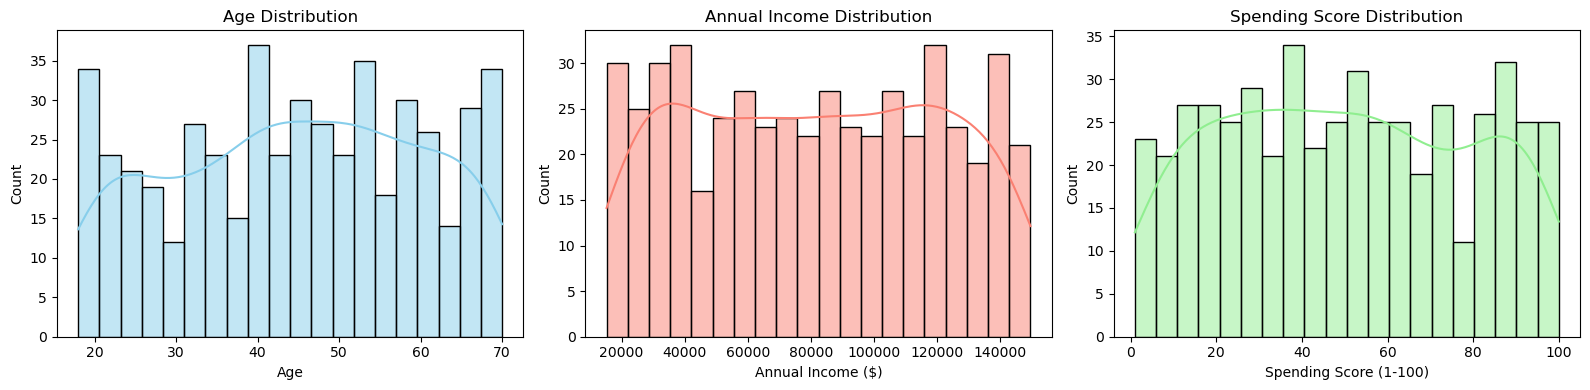

In [57]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income ($)'], bins=20, kde=True, color='salmon')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

features = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 3. Clustering

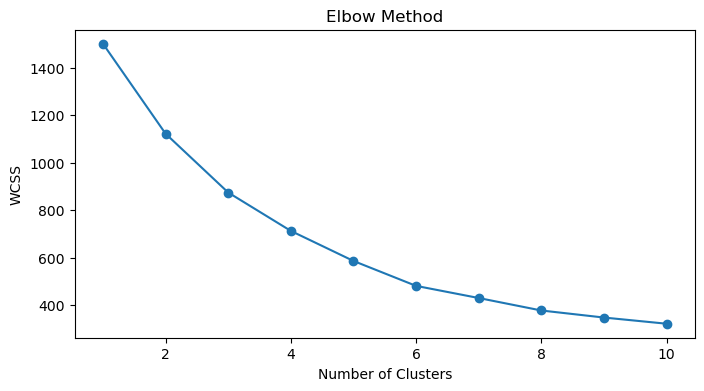

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [68]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {sil_score:.4f}")

Silhouette Score for k=2: 0.2448
Silhouette Score for k=3: 0.2503
Silhouette Score for k=4: 0.2635
Silhouette Score for k=5: 0.2691
Silhouette Score for k=6: 0.2912
Silhouette Score for k=7: 0.2742
Silhouette Score for k=8: 0.2756
Silhouette Score for k=9: 0.2713
Silhouette Score for k=10: 0.2802


In [69]:
# Assuming k = 4 based on elbow or silhouette
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = final_kmeans.fit_predict(scaled_features)

## 4. Visualization

In [71]:
from sklearn.decomposition import PCA

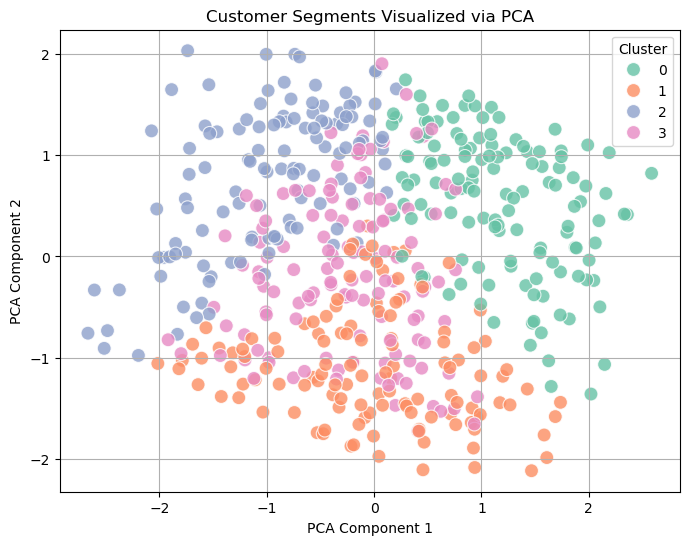

In [73]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

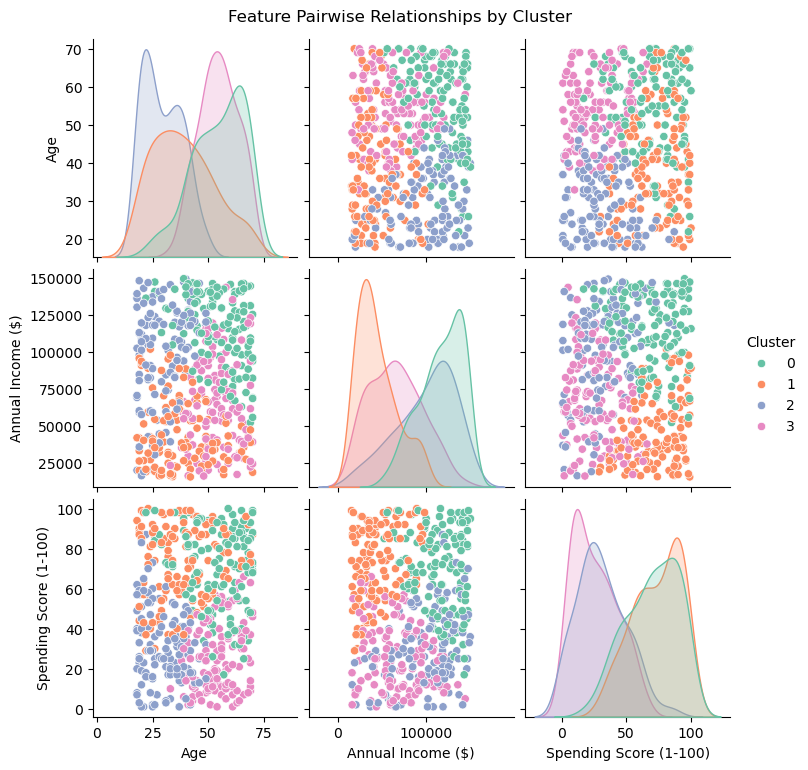

In [74]:
sns.pairplot(data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Feature Pairwise Relationships by Cluster", y=1.02)
plt.show()

Cluster Centroids:
          Age  Annual Income ($)  Spending Score (1-100)  Cluster
0  54.565891      116021.813953               69.906977        0
1  39.024194       44250.524194               73.411290        1
2  29.583333       98762.908333               30.783333        2
3  54.629921       65247.401575               25.881890        3


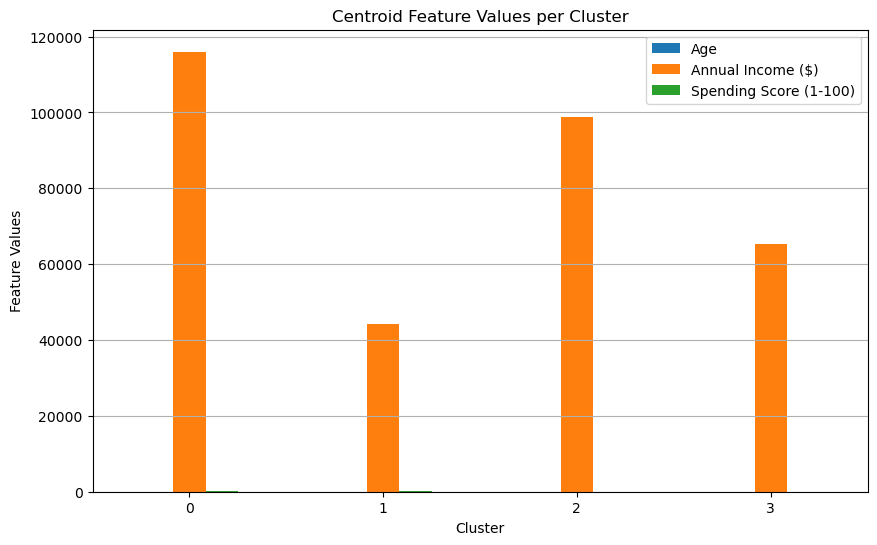

In [79]:
# Reverse scale to get centroid values in original scale
import pandas as pd
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income ($)', 'Spending Score (1-100)'])
centroid_df['Cluster'] = range(optimal_k)
print("Cluster Centroids:\n", centroid_df)

# Bar plot to visualize centroids
centroid_df.set_index('Cluster').plot(kind='bar', figsize=(10, 6))
plt.title("Centroid Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Values")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()